# Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Energy prices

#### Coal

         Close    High     Low  Volume      Date
Open                                            
0.00    114.80    0.00    0.00     NaN  09/24/24
115.00  114.65  115.00  115.00     NaN  09/23/24
0.00    114.35    0.00    0.00     NaN  09/20/24
114.75  114.25  114.75  114.75     NaN  09/19/24
114.00  114.25  114.00  114.00     NaN  09/18/24


/var/folders/62/r__yd2rs2jz73f2qx2dnmwx00000gn/T/ipykernel_52089/3225093466.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coal["Date"] = pd.to_datetime(coal["Date"])


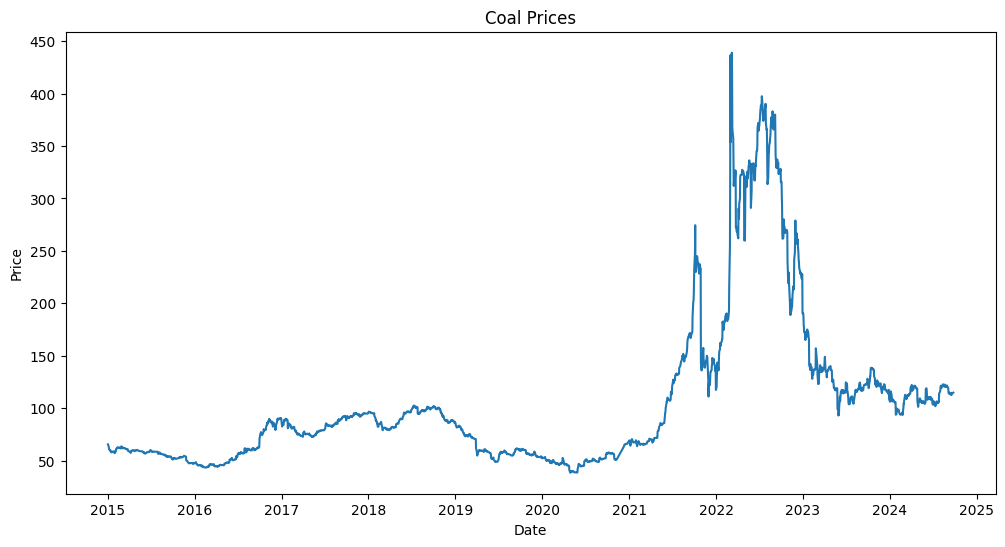

In [13]:
# Load coal prices
coal = pd.read_csv("Datasets/coalspotprices.csv", index_col=0)

# Print head
print(coal.head())

# Convert Date column to datetime
coal["Date"] = pd.to_datetime(coal["Date"])

# Set Date column as index
coal.set_index("Date", inplace=True)

# Plot close price
plt.figure(figsize=(12, 6))
plt.plot(coal.index, coal["Close"])
plt.title("Coal Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Leave only close price and date columns
coal = coal[["Close"]]

# Rename Close to coal
coal.rename(columns={"Close": "coal_price"}, inplace=True)


### Crude oil

            Europe Brent Spot Price FOB (Dollars per Barrel)
Date                                                        
1987-05-20                                             18.63
1987-05-21                                             18.45
1987-05-22                                             18.55
1987-05-25                                             18.60
1987-05-26                                             18.63


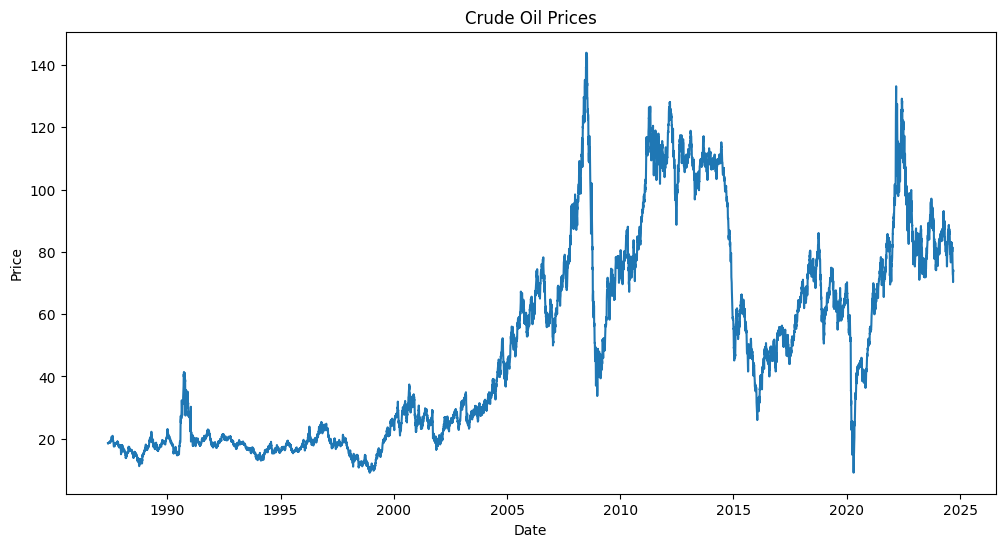

In [14]:
# Load crude oil and convert to dataframe (crudeoilspotprices.xls)
crude_oil = pd.read_excel("Datasets/crudeoilspotprices.xls", index_col=0)

# Print head
print(crude_oil.head())

# Plot close price
plt.figure(figsize=(12, 6))
plt.plot(crude_oil.index, crude_oil["Europe Brent Spot Price FOB (Dollars per Barrel)"])
plt.title("Crude Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Rename column to crude_oil_price
crude_oil.rename(columns={"Europe Brent Spot Price FOB (Dollars per Barrel)": "crude_oil_price"}, inplace=True)



           DHHNGSP
DATE              
2014-09-17    3.97
2014-09-18    3.99
2014-09-19    3.99
2014-09-22    3.88
2014-09-23    3.90


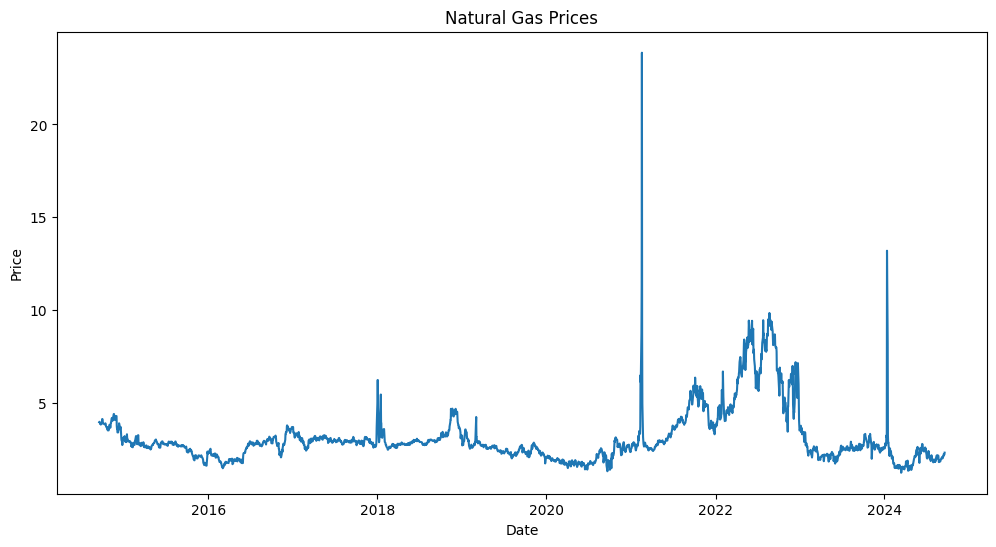

In [15]:
# Load natural gas prices (gasspotprices.csv)
natural_gas = pd.read_csv("Datasets/gasspotprices.csv", parse_dates=['DATE'], index_col='DATE')

# Print head
print(natural_gas.head())

# Convert DHHNGSP column to numeric, coercing errors to NaN
natural_gas['DHHNGSP'] = pd.to_numeric(natural_gas['DHHNGSP'], errors='coerce')

# Impute missing values between surrounding values
natural_gas.interpolate(method="linear", inplace=True)

# Plot DHHNGSP to date
plt.figure(figsize=(12, 6))
plt.plot(natural_gas.index, natural_gas["DHHNGSP"])
plt.title("Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Rename column to natural_gas_price
natural_gas.rename(columns={"DHHNGSP": "natural_gas_price"}, inplace=True)


### Energy prices combined

In [16]:
# merge coal, crude_oil and natural_gas
energy_prices = pd.concat([coal, crude_oil, natural_gas], axis=1)

# Print head
print(energy_prices.head())

# Plot coal_price
plt.figure(figsize=(12, 6))


            coal_price  crude_oil_price  natural_gas_price
1987-05-20         NaN            18.63                NaN
1987-05-21         NaN            18.45                NaN
1987-05-22         NaN            18.55                NaN
1987-05-25         NaN            18.60                NaN
1987-05-26         NaN            18.63                NaN


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# Hydro levels

In [17]:
# import hydrolevelsNO2.xlsx
hydro = pd.read_excel("Datasets/hydrolevelsNO2.xlsx", index_col=0)

# Print head
print(hydro.head())

         Maks    Median       Min      2024      2023    2022 %    2021 %  \
Uke                                                                         
1    0.859953  0.717364  0.402455  0.657669  0.620770  0.474744  0.850446   
2    0.823707  0.716029  0.380270  0.621899  0.618837  0.463032  0.815886   
3    0.792251  0.684954  0.362181  0.588884  0.589409  0.441059  0.792251   
4    0.776966  0.651065  0.336421  0.578012  0.564346  0.433704  0.753097   
5    0.761778  0.619767  0.318026  0.569366  0.544842  0.419494  0.718698   

       2020 %    2019 %    2018 %  ...  2003 %  2002 %  2001 %  2000 %  \
Uke                                ...                                   
1    0.716256  0.661513  0.793895  ...     NaN     NaN     NaN     NaN   
2    0.725944  0.640588  0.762394  ...     NaN     NaN     NaN     NaN   
3    0.723951  0.612380  0.731388  ...     NaN     NaN     NaN     NaN   
4    0.718062  0.577629  0.707339  ...     NaN     NaN     NaN     NaN   
5    0.704739  0

        Date  Fill_Level
0 2005-01-03    0.759217
1 2005-01-04    0.760215
2 2005-01-05    0.761214
3 2005-01-06    0.762213
4 2005-01-07    0.763212


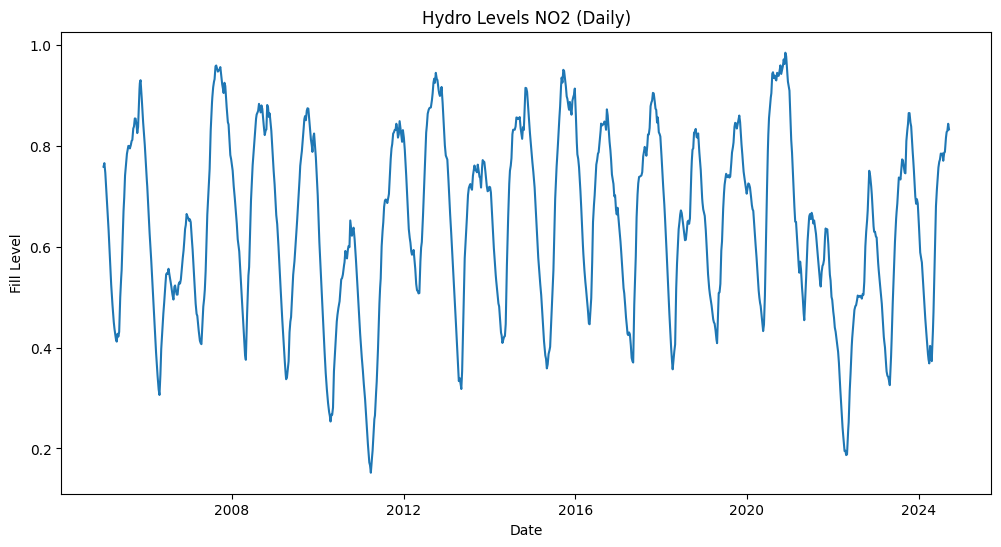

In [18]:
# Transform hydro levels data
def transform_hydro_data(df):
    # Melt the dataframe
    melted = df.reset_index().melt(id_vars=['Uke'], var_name='Year', value_name='Fill_Level')
    
    # Convert 'Year' to string and remove ' %' if present
    melted['Year'] = melted['Year'].astype(str).str.replace(' %', '', regex=False)
    
    # Filter out non-year columns and rows with NaN values
    melted = melted[melted['Year'].str.isnumeric()]
    melted = melted.dropna(subset=['Fill_Level'])
    
    # Create date column (set to Monday of each week)
    melted['Date'] = pd.to_datetime(melted['Year'].astype(int).astype(str) + '-W' + melted['Uke'].astype(str) + '-1', format='%Y-W%W-%w')
    
    # Group by Date and take the mean of Fill_Level to handle duplicates
    result = melted.groupby('Date')['Fill_Level'].mean().reset_index()
    
    # Sort by date
    result = result.sort_values('Date')
    
    # Set Date as index
    result.set_index('Date', inplace=True)
    
    # Resample to daily frequency and interpolate
    result_daily = result.resample('D').interpolate(method='linear')
    
    return result_daily.reset_index()

# Apply transformation
hydro_transformed = transform_hydro_data(hydro)

# Print head of transformed data
print(hydro_transformed.head())

# Plot transformed hydro levels
plt.figure(figsize=(12, 6))
plt.plot(hydro_transformed['Date'], hydro_transformed['Fill_Level'])
plt.title("Hydro Levels NO2 (Daily)")
plt.xlabel("Date")
plt.ylabel("Fill Level")
plt.show()

# Weather


Transformed weather data (average for NO2 region with imputed values):
            Precipitation  Max_Temp  Avg_Temp  Min_Temp  Max_Wind  Max_Gust  \
Date                                                                          
2015-01-01            0.0       8.0       6.0       1.0      15.0      27.0   
2015-01-02            0.0       8.0       6.0       1.0      15.0      27.0   
2015-01-03            0.0       8.0       6.0       1.0      15.0      27.0   
2015-01-04            0.0       8.0      -6.0       1.0      15.0      27.0   
2015-01-05            0.0       8.0      -6.0       1.0      15.0      27.0   

            Avg_Wind  Snow_Depth  
Date                              
2015-01-01       2.0        17.5  
2015-01-02       2.0        15.0  
2015-01-03       2.0        21.5  
2015-01-04       2.0        21.5  
2015-01-05       2.0        20.5  


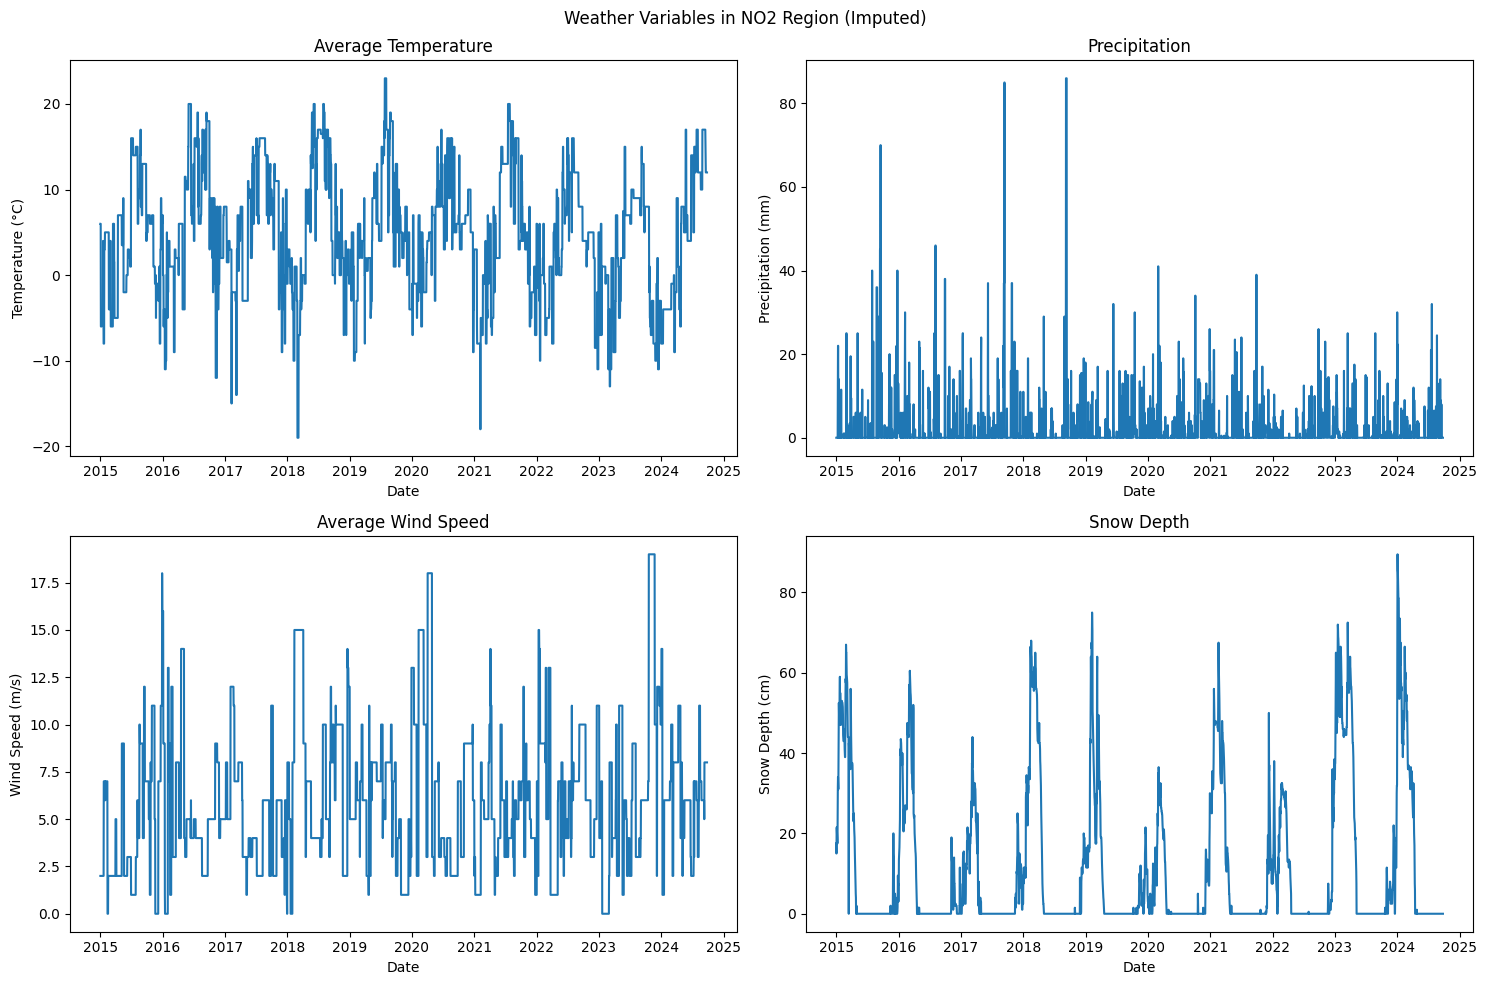


Missing values after imputation:
Precipitation    0
Max_Temp         0
Avg_Temp         0
Min_Temp         0
Max_Wind         0
Max_Gust         0
Avg_Wind         0
Snow_Depth       0
dtype: int64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
weather1 = pd.read_csv("Datasets/NO2Weatherdata.csv", sep=";", decimal=",")
weather2 = pd.read_csv("Datasets/NO2Weatherdata2.csv", sep=";", decimal=",")

# Convert 'Tid(norsk normaltid)' to datetime in both dataframes
weather1['Tid(norsk normaltid)'] = pd.to_datetime(weather1['Tid(norsk normaltid)'], format='%d.%m.%Y')
weather2['Tid(norsk normaltid)'] = pd.to_datetime(weather2['Tid(norsk normaltid)'], format='%d.%m.%Y')

# Merge the two datasets on common columns
weather = pd.merge(weather1, weather2, on=["Navn", "Stasjon", "Tid(norsk normaltid)"], how='outer')

# Rename columns for clarity
weather.rename(columns={
    'Tid(norsk normaltid)': 'Date',
    'Nedbør (døgn)': 'Precipitation',
    'Maksimumstemperatur (døgn)': 'Max_Temp',
    'Middeltemperatur (døgn)': 'Avg_Temp',
    'Minimumstemperatur (døgn)': 'Min_Temp',
    'Høyeste middelvind (døgn)': 'Max_Wind',
    'Høyeste vindkast (døgn)': 'Max_Gust',
    'Middel av middelvind fra hovedobs. (døgn)': 'Avg_Wind',
    'Snødybde': 'Snow_Depth'
}, inplace=True)

# Convert numeric columns to float, replacing '-' with NaN
numeric_columns = ['Precipitation', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_Wind', 'Max_Gust', 'Avg_Wind', 'Snow_Depth']
for col in numeric_columns:
    weather[col] = pd.to_numeric(weather[col].replace('-', pd.NA), errors='coerce')

# Group by date and calculate the mean for all numeric columns
weather_avg = weather.groupby('Date')[numeric_columns].mean()

# Sort the index to ensure chronological order
weather_avg = weather_avg.sort_index()

# Impute missing values using forward fill followed by backward fill
weather_avg = weather_avg.ffill().bfill()

# Print the first few rows of the transformed dataset
print("\nTransformed weather data (average for NO2 region with imputed values):")
print(weather_avg.head())

# Plot some of the weather variables
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Weather Variables in NO2 Region (Imputed)')

axs[0, 0].plot(weather_avg.index, weather_avg['Avg_Temp'])
axs[0, 0].set_title('Average Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temperature (°C)')

axs[0, 1].plot(weather_avg.index, weather_avg['Precipitation'])
axs[0, 1].set_title('Precipitation')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Precipitation (mm)')

axs[1, 0].plot(weather_avg.index, weather_avg['Avg_Wind'])
axs[1, 0].set_title('Average Wind Speed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed (m/s)')

axs[1, 1].plot(weather_avg.index, weather_avg['Snow_Depth'])
axs[1, 1].set_title('Snow Depth')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Snow Depth (cm)')

plt.tight_layout()
plt.show()

# Check for any remaining missing values
print("\nMissing values after imputation:")
print(weather_avg.isnull().sum())

In [21]:
# ... existing code ...

# Combine all datasets
combined_data = pd.concat([
    energy_prices,
    hydro_transformed.set_index('Date'),
    weather_avg
], axis=1, join='outer')

# Sort the index to ensure chronological order
combined_data = combined_data.sort_index()

# Filter data from 2016 to 2022
combined_data = combined_data.loc['2016-01-01':'2022-12-31']

# Impute missing values using multiple methods
for column in combined_data.columns:
    if combined_data[column].dtype in ['float64', 'int64']:
        # For numeric columns, use interpolation
        combined_data[column] = combined_data[column].interpolate(method='time')
    else:
        # For non-numeric columns, use forward fill followed by backward fill
        combined_data[column] = combined_data[column].ffill().bfill()

# Convert index to datetime_utc
combined_data.index = pd.to_datetime(combined_data.index, utc=True)

# Rename the index to 'datetime_utc'
combined_data.index.name = 'datetime_utc'

# Print information about the combined dataset
print("\nCombined dataset info:")
print(combined_data.info())

# Display the first few rows of the combined dataset
print("\nFirst few rows of the combined dataset:")
print(combined_data.head())

# Check for any remaining missing values
print("\nMissing values in the combined dataset:")
print(combined_data.isnull().sum())

# Save as csv with datetime_utc index
combined_data.to_csv('Datasets/supplementary_data_overview.csv', date_format='%Y-%m-%d %H:%M:%S%z')


Combined dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2557 entries, 2016-01-01 00:00:00+00:00 to 2022-12-31 00:00:00+00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   coal_price         2554 non-null   float64
 1   crude_oil_price    2554 non-null   float64
 2   natural_gas_price  2557 non-null   float64
 3   Fill_Level         2557 non-null   float64
 4   Precipitation      2557 non-null   float64
 5   Max_Temp           2557 non-null   float64
 6   Avg_Temp           2557 non-null   float64
 7   Min_Temp           2557 non-null   float64
 8   Max_Wind           2557 non-null   float64
 9   Max_Gust           2557 non-null   float64
 10  Avg_Wind           2557 non-null   float64
 11  Snow_Depth         2557 non-null   float64
dtypes: float64(12)
memory usage: 259.7 KB
None

First few rows of the combined dataset:
                           coal_price  crude_oil_price  natu